# AirTrafic Passenger (Clustering)
## Author: Eren ERİŞ

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from yellowbrick.cluster import KElbowVisualizer
import datetime as dt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram,linkage

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('air-traffic-passenger-statistics.csv')

In [4]:
# EDA 

In [5]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [6]:
df.shape

(18885, 12)

In [7]:
df.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    63
Published Airline               0
Published Airline IATA Code    63
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'US'),
  Text(1, 0, 'Canada'),
  Text(2, 0, 'Asia'),
  Text(3, 0, 'Europe'),
  Text(4, 0, 'Australia / Oceania'),
  Text(5, 0, 'Mexico'),
  Text(6, 0, 'Central America'),
  Text(7, 0, 'Middle East'),
  Text(8, 0, 'South America')])

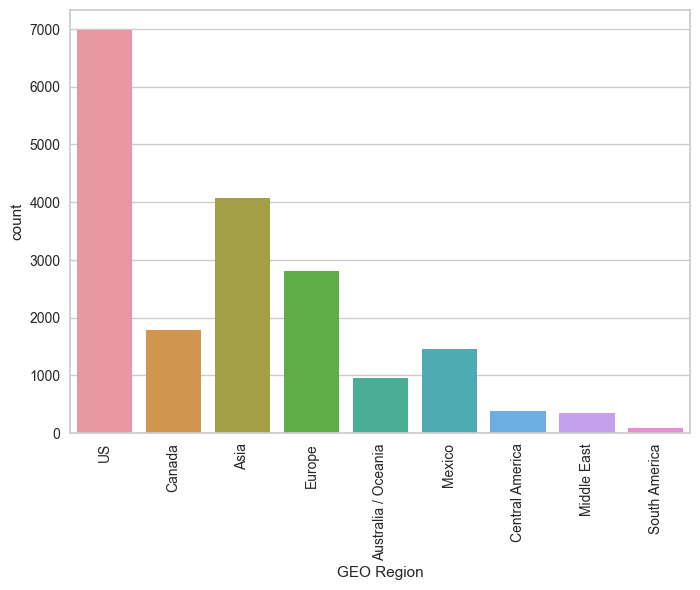

In [8]:
sn.countplot(df, x="GEO Region")
plt.xticks(rotation=90)

In [9]:
df.columns # Dataframe Colum isimleri

Index(['Activity Period', 'Operating Airline', 'Operating Airline IATA Code',
       'Published Airline', 'Published Airline IATA Code', 'GEO Summary',
       'GEO Region', 'Activity Type Code', 'Price Category Code', 'Terminal',
       'Boarding Area', 'Passenger Count'],
      dtype='object')

In [10]:
x=df[['Operating Airline','GEO Summary','GEO Region']] # Clustrer Dataframe Hazırlama

In [11]:
x=pd.get_dummies(x,drop_first=True) 

In [12]:
wcss=[] #Dirsek Noktasını Hesaplama
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [13]:
wcss #Verielere Göre Dirsek Noktası 1

[34046.105586444406,
 24613.475923525322,
 22084.99456328585,
 20313.81440710481,
 18916.315504504073,
 18592.70910471567,
 17359.50894306874,
 16888.8051021334,
 16267.766240964433]

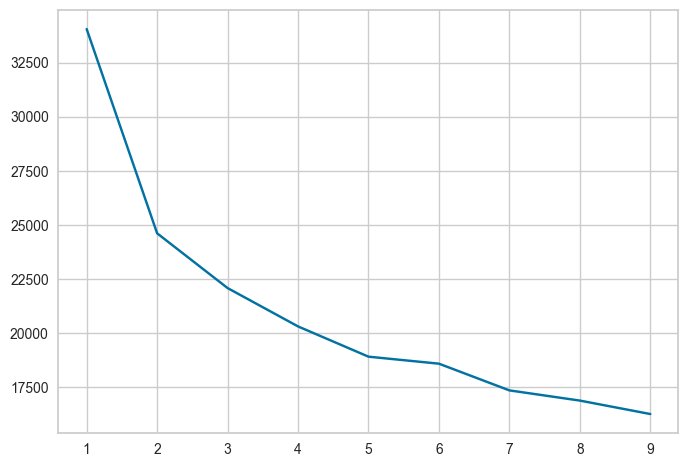

In [14]:
plt.plot(range(1,10),wcss)

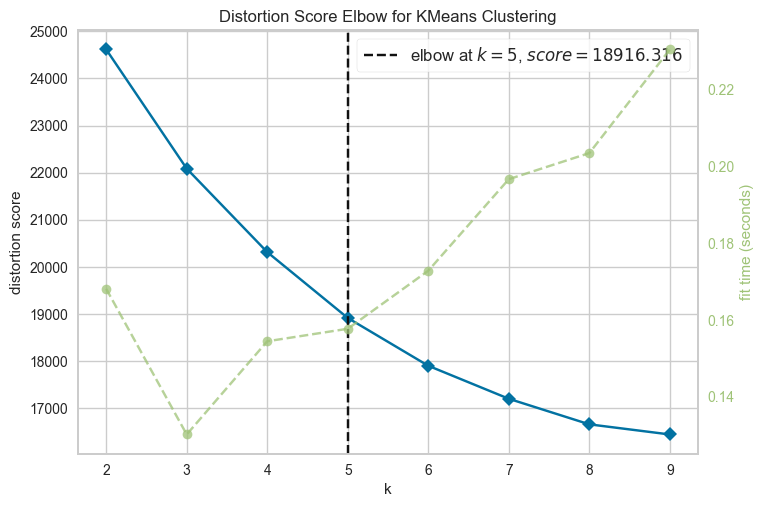

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
km = KMeans() # Clusteerin için Hazır kütüphane ile destek noktasının bulunması
visualizer = KElbowVisualizer(km,k=(2,10))
visualizer.fit(x)
visualizer.show()

In [16]:
#Model Oluşturma Ve Tahmin Etme

In [17]:
model = KMeans(5)
model=model.fit(x)
Tahmin = model.predict(x)
x["Cluster"]=Tahmin

In [18]:
x.head()

,Operating Airline_ATA Airlines,Operating Airline_Aer Lingus,Operating Airline_Aeromexico,Operating Airline_Air Berlin,Operating Airline_Air Canada,Operating Airline_Air Canada Jazz,Operating Airline_Air China,Operating Airline_Air France,Operating Airline_Air India Limited,Operating Airline_Air New Zealand,...,GEO Summary_International,GEO Region_Australia / Oceania,GEO Region_Canada,GEO Region_Central America,GEO Region_Europe,GEO Region_Mexico,GEO Region_Middle East,GEO Region_South America,GEO Region_US,Cluster
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,1
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,1
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,1
3,False,False,False,False,True,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,3
4,False,False,False,False,True,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,3


In [19]:
# Data Visulation

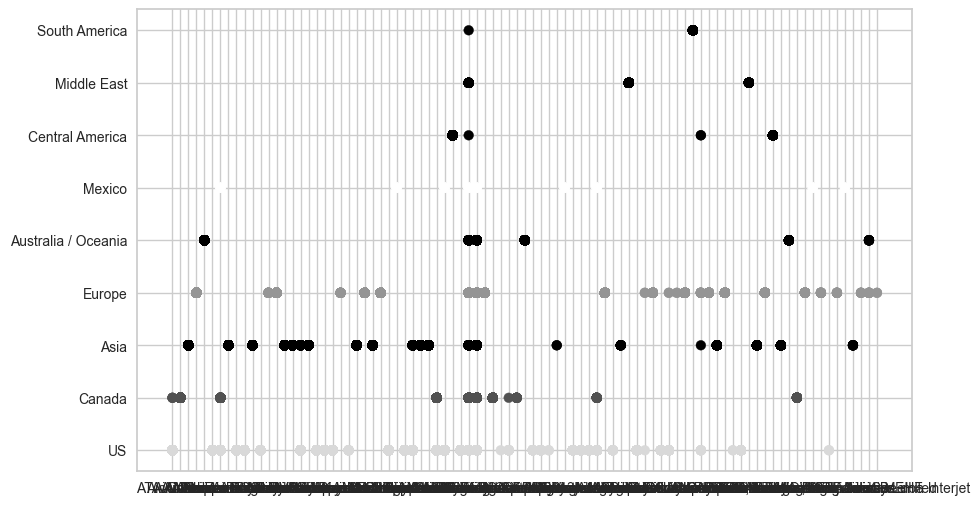

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(df['Operating Airline'],df['GEO Region'],c=Tahmin)

In [21]:
data=linkage(x,method='ward',metric='euclidean')

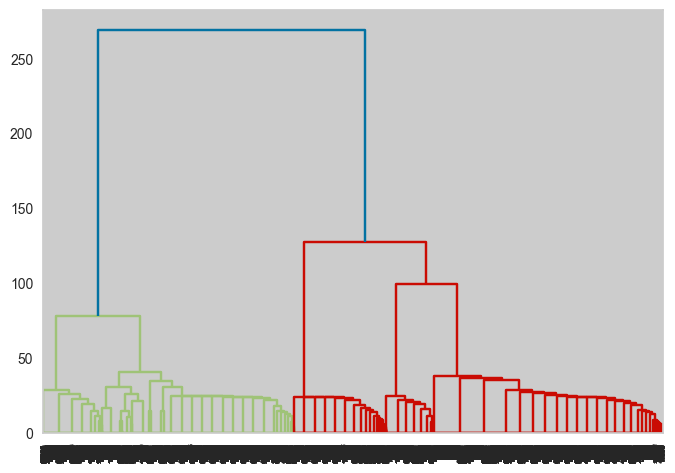

In [22]:
dendrogram(data);